<a href="https://colab.research.google.com/github/veronikahill/HeartFailure/blob/main/HF_Mortalities_VH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


from google.colab import drive
drive.mount('/content/drive')

filePath = "/content/drive/MyDrive/Pitt/DataScience/Hospital_Mortality_Rates.csv"

full_df = pd.read_csv(filePath)

full_df.shape

Mounted at /content/drive


(1177, 51)

In [ ]:
################################ CLEANING & PROCESSING ################################

In [ ]:

#Removing unnecessary columns 'group' and 'ID'

df = full_df.drop(['group', 'ID'], axis=1)


#Loop through the df to find the columns that have over 15% of the data missing and removing those columns from the df
total_rows = df.shape[0]


for column in df.columns:
  na_sums = df[column].isna().sum()
  na_percent = (na_sums * 100)/total_rows
  if na_percent > 18:
   print(f"{na_percent} % of the {column} column is missing, so the column will be removed.")
   df.drop(f"{column}", axis=1, inplace=True)

df.head()

#Now all of the columns with over 18% of their data are removed from the dataframe.

#dropping rows if the 'outcome' variable is missing

df.dropna(subset=['outcome'], inplace=True)

#looping through each row to get the % of missing data for each record and dropping the row if 18% or more is missing

total_cols = len(df.columns)

drop_rows=[]

for index, row in df.iterrows():
  missing_values = row.isnull().sum()
  percent_missing = (missing_values * 100) / total_cols
  if percent_missing > 18:
    print(f"\n Row with index {index} is missing {percent_missing} % of data and will be dropped.")
    drop_rows.append(index)


df.drop(drop_rows, inplace=True)

#renaming columns (this is done because the blank spaces affect the regression model below)
df.rename(columns={"gendera":"gender"}, inplace=True)
df.rename(columns={"heart rate":"heart_rate"}, inplace=True)
df.rename(columns={"Systolic blood pressure":"SBP"}, inplace=True)
df.rename(columns={"Diastolic blood pressure":"DBP"}, inplace=True)
df.rename(columns={"Respiratory rate":"Respiratory_rate"}, inplace=True)
df.rename(columns={"SP O2":"SPO2"}, inplace=True)
df.rename(columns={"Urine output":"Urine_output"}, inplace=True)
df.rename(columns={"Creatine kinase":"Creatine_kinase"}, inplace=True)
df.rename(columns={"Urea nitrogen":"Urea_nitrogen"}, inplace=True)
df.rename(columns={"Blood pressure":"Blood_pressure"}, inplace=True)
df.rename(columns={"Blood potassium":"Blood_potassium"}, inplace=True)
df.rename(columns={"Blood sodium":"Blood_sodium"}, inplace=True)
df.rename(columns={"Blood calcium":"Blood_calcium"}, inplace=True)
df.rename(columns={"Anion gap":"Anion_gap"}, inplace=True)
df.rename(columns={"Magnesium ion":"Magnesium"}, inplace=True)
df.rename(columns={"CHD with no MI":"CHD_noMI"}, inplace=True)
df.rename(columns={"Magnesium ion":"Magnesium"}, inplace=True)
df.rename(columns={"NT-proBNP":"NTproBNP"}, inplace=True)
df.rename(columns={"Renal failure":"renal_failure"}, inplace=True)



df.shape

18.26677994902294 % of the BMI column is missing, so the column will be removed.
22.005097706032284 % of the Basophils column is missing, so the column will be removed.
24.808836023789294 % of the PH column is missing, so the column will be removed.
19.456244689889548 % of the Lactic acid column is missing, so the column will be removed.
24.97875955819881 % of the PCO2 column is missing, so the column will be removed.

 Row with index 712 is missing 18.181818181818183 % of data and will be dropped.

 Row with index 731 is missing 18.181818181818183 % of data and will be dropped.

 Row with index 734 is missing 18.181818181818183 % of data and will be dropped.

 Row with index 735 is missing 18.181818181818183 % of data and will be dropped.

 Row with index 737 is missing 18.181818181818183 % of data and will be dropped.

 Row with index 739 is missing 18.181818181818183 % of data and will be dropped.

 Row with index 763 is missing 18.181818181818183 % of data and will be dropped.

 Ro

(1166, 44)

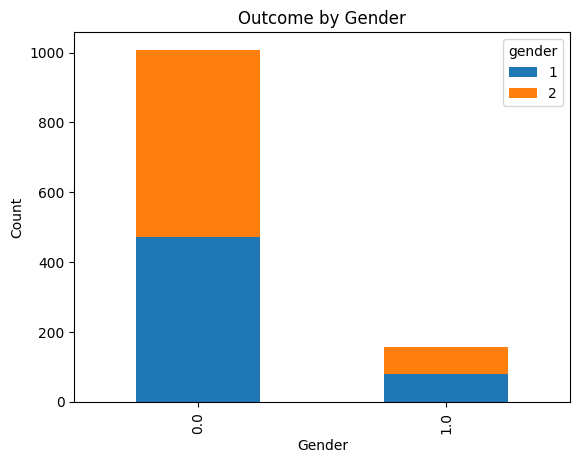

outcome  gender
0.0      1         472
         2         536
1.0      1          80
         2          78
dtype: int64


In [ ]:
#initial look at outcomes and gender from raw data

outcomes = df.groupby(['outcome',"gender"]).size().unstack()

outcomes.plot(kind='bar',stacked=True)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Outcome by Gender')

# Show the plot
plt.show()

counts=df.groupby(['outcome',"gender"]).size()

print(counts)

In [ ]:
#CENTRAL TENDENCY > mean, median mode for each appropriate column and creating a dictionary of the column and values

means = {}
medians = {}
modes = {}

# Loop through each column in the df
for column in df.columns:
        #calculate mean, median, and mode for the numeric column
        column_mean = df[column].mean()
        column_median = df[column].median()
        column_mode = df[column].mode()

        #create the dictionary
        means[column] = column_mean
        medians[column] = column_median
        modes[column] = column_mode


print(means)

{'outcome': 0.13550600343053174, 'age': 74.02315608919382, 'gender': 1.5265866209262435, 'hypertensive': 0.7178387650085764, 'atrialfibrillation': 0.45197255574614065, 'CHD_noMI': 0.08404802744425385, 'diabetes': 0.42109777015437394, 'deficiencyanemias': 0.33876500857632935, 'depression': 0.1183533447684391, 'Hyperlipemia': 0.37735849056603776, 'renal_failure': 0.36192109777015435, 'COPD': 0.07632933104631218, 'heart_rate': 84.57584840750859, 'SBP': 117.99503522048234, 'DBP': 59.53449655225668, 'Respiratory_rate': 20.801511481503436, 'temperature': 36.67728595220207, 'SPO2': 96.27290043504296, 'Urine_output': 1899.2765118317266, 'hematocrit': 31.928733724794167, 'RBC': 3.578145857927101, 'MCH': 29.525139063044595, 'MCHC': 32.86396703310463, 'MCV': 89.85950637517152, 'RDW': 15.952611096089196, 'Leucocyte': 10.724646263751287, 'Platelets': 241.88196830149312, 'Neutrophils': 80.11187990824853, 'Lymphocyte': 12.225528310287954, 'PT': 17.464846071361254, 'INR': 1.624292890652705, 'NTproBNP'

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'SBP'}>, <Axes: title={'center': 'DBP'}>,
        <Axes: title={'center': 'Respiratory_rate'}>,
        <Axes: title={'center': 'temperature'}>],
       [<Axes: title={'center': 'SPO2'}>,
        <Axes: title={'center': 'Urine_output'}>,
        <Axes: title={'center': 'hematocrit'}>,
        <Axes: title={'center': 'RBC'}>, <Axes: title={'center': 'MCH'}>,
        <Axes: title={'center': 'MCHC'}>],
       [<Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'RDW'}>,
        <Axes: title={'center': 'Leucocyte'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Neutrophils'}>,
        <Axes: title={'center': 'Lymphocyte'}>],
       [<Axes: title={'center': 'PT'}>, <Axes: title={'center': 'INR'}>,
        <Axes: title={'center': 'NTproBNP'}>,
        <Axes: title={'center': 'Creatine_kinase'}>,
        <Axes: title={'center': 'Creat

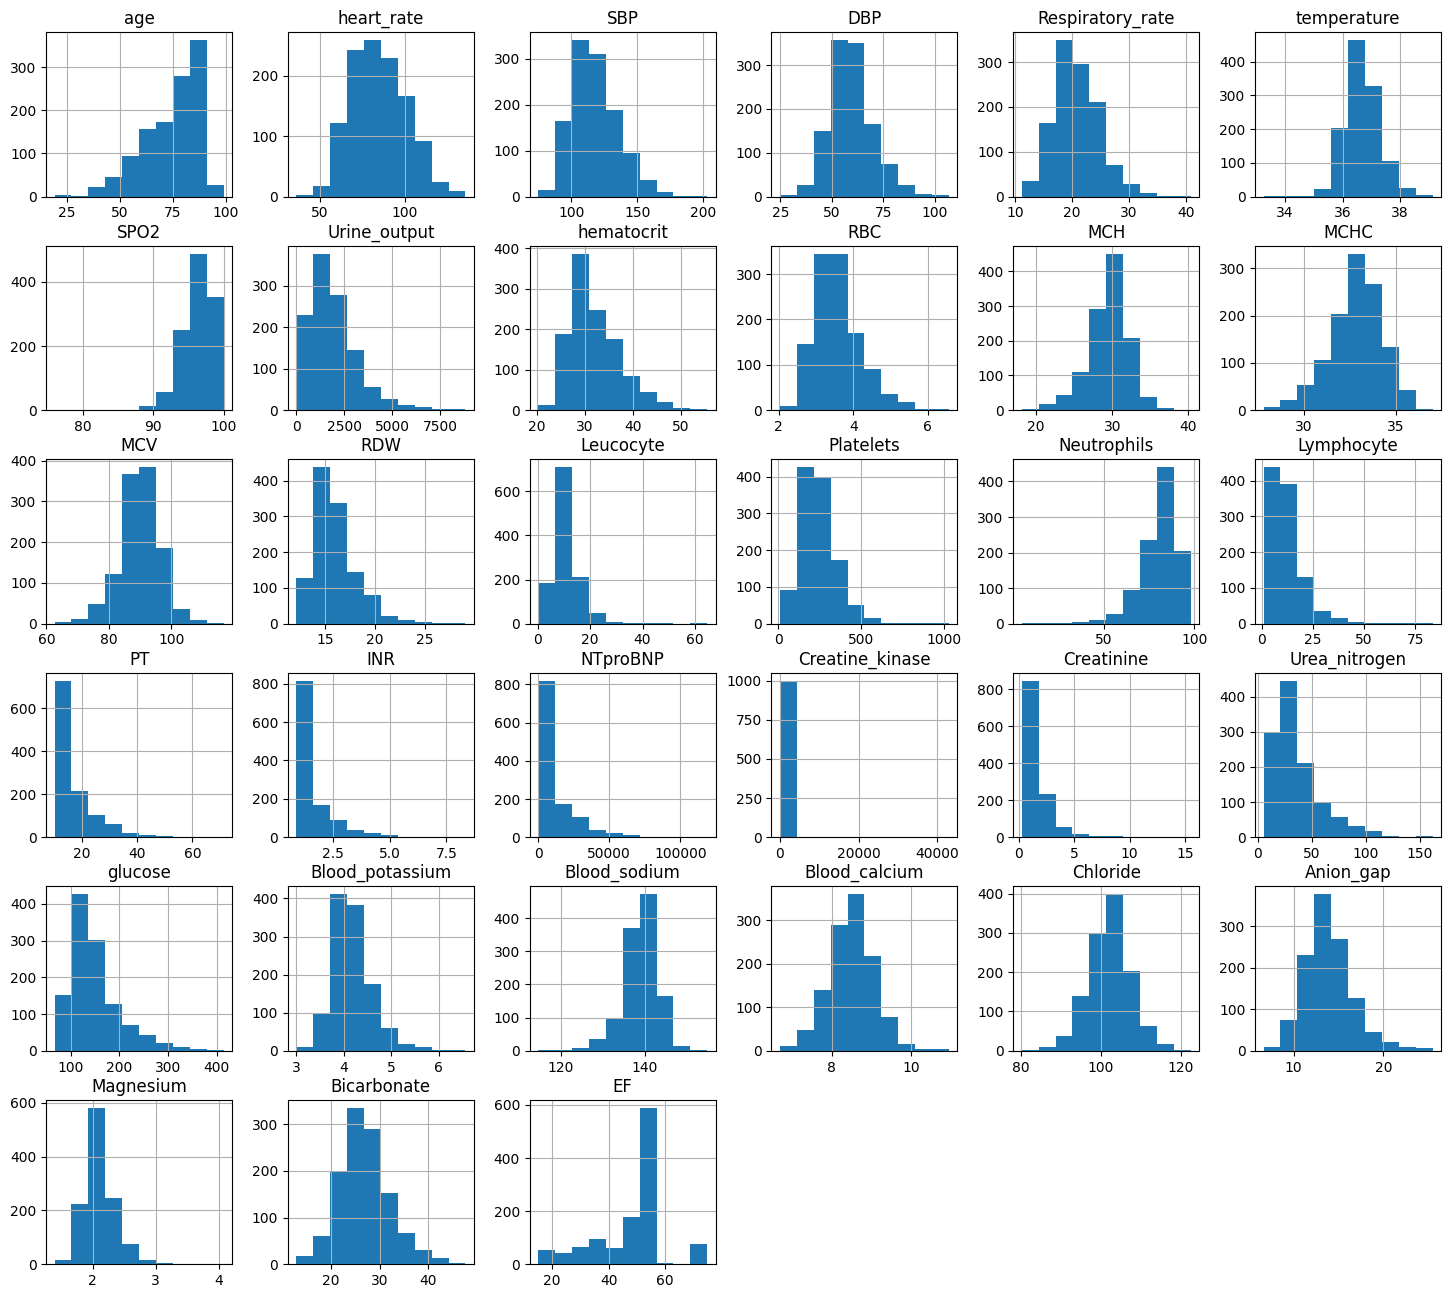

In [ ]:
#separating continuous vs. categorical variables and getting a visual of normality with histograms for continuous variables
df_cont = df.loc[:, ['age','heart_rate','SBP', 'DBP','Respiratory_rate', 'temperature', 'SPO2', 'Urine_output','hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte','Platelets', 'Neutrophils', 'Lymphocyte', 'PT', 'INR', 'NTproBNP','Creatine_kinase', 'Creatinine', 'Urea_nitrogen', 'glucose','Blood_potassium', 'Blood_sodium', 'Blood_calcium', 'Chloride','Anion_gap', 'Magnesium', 'Bicarbonate', 'EF']]
df_cat = df.loc[:, ["outcome", "gender", "hypertensive", "atrialfibrillation", "CHD_noMI", "diabetes", "deficiencyanemias", "depression", "Hyperlipemia", "renal_failure", "COPD"]]

df_cont.hist(figsize = (18,16))




In [ ]:
#loop through columns and find outliers via IQR

min_dict = {}
max_dict = {}
for column in df_cont.columns:

    q1 = df_cont[column].quantile(0.25)
    q3 = df_cont[column].quantile(0.75)

    iqr = q3 - q1
    print(f"Column '{column}': IQR = {iqr}")
    #print(f"Q1: {q1}, Q2: {q3}")

    min_outlier = q1 - (1.5*iqr)
    max_outlier = q3 + (1.5*iqr)

    min_dict[column] = min_outlier
    max_dict[column] = max_outlier

    print("q1: ", q1)
    print("q3: ", q3)
    print(f"The mean is: {means[column]}")
    print(f"The median is: {medians[column]}")
    print(f"Without Outliers, column '{column}' has a range of {min_outlier} - {max_outlier}" )

    print(f"The min for column '{column}' is: ", df[column].min(), ", and the max is: ", df[column].max(), "\n")



    #fill in missing data on continuous variables
    #if IQR is < average, it suggests that 50% of the data is more tightly clustered around the mean
    #if IQR is smaller than the mean, means are used to fill missing data
    #if IQR is bigger than mean, medians are used
    if iqr < means[column]:
        df_cont[column].fillna(means[column], inplace=True)
        print(f"Filling missing data in column '{column}' with mean value: {means[column]}")
    else:
        df_cont[column].fillna(medians[column], inplace=True)
        print(f"Filling missing data in column '{column}' with median value: {medians[column]}")




Column 'age': IQR = 20.0
q1:  65.0
q3:  85.0
The mean is: 74.02315608919382
The median is: 77.0
Without Outliers, column 'age' has a range of 35.0 - 115.0
The min for column 'age' is:  19 , and the max is:  99 

Filling missing data in column 'age' with mean value: 74.02315608919382
Column 'heart_rate': IQR = 23.535892855
q1:  72.37125
q3:  95.907142855
The mean is: 84.57584840750859
The median is: 83.61079944
Without Outliers, column 'heart_rate' has a range of 37.0674107175 - 131.2109821375
The min for column 'heart_rate' is:  36.0 , and the max is:  135.7083333 

Filling missing data in column 'heart_rate' with mean value: 84.57584840750859
Column 'SBP': IQR = 23.2336957
q1:  105.3913043
q3:  128.625
The mean is: 117.99503522048234
The median is: 116.1282051
Without Outliers, column 'SBP' has a range of 70.54076075 - 163.47554355
The min for column 'SBP' is:  75.0 , and the max is:  203.0 

Filling missing data in column 'SBP' with mean value: 117.99503522048234
Column 'DBP': IQR = 

(1166, 44)

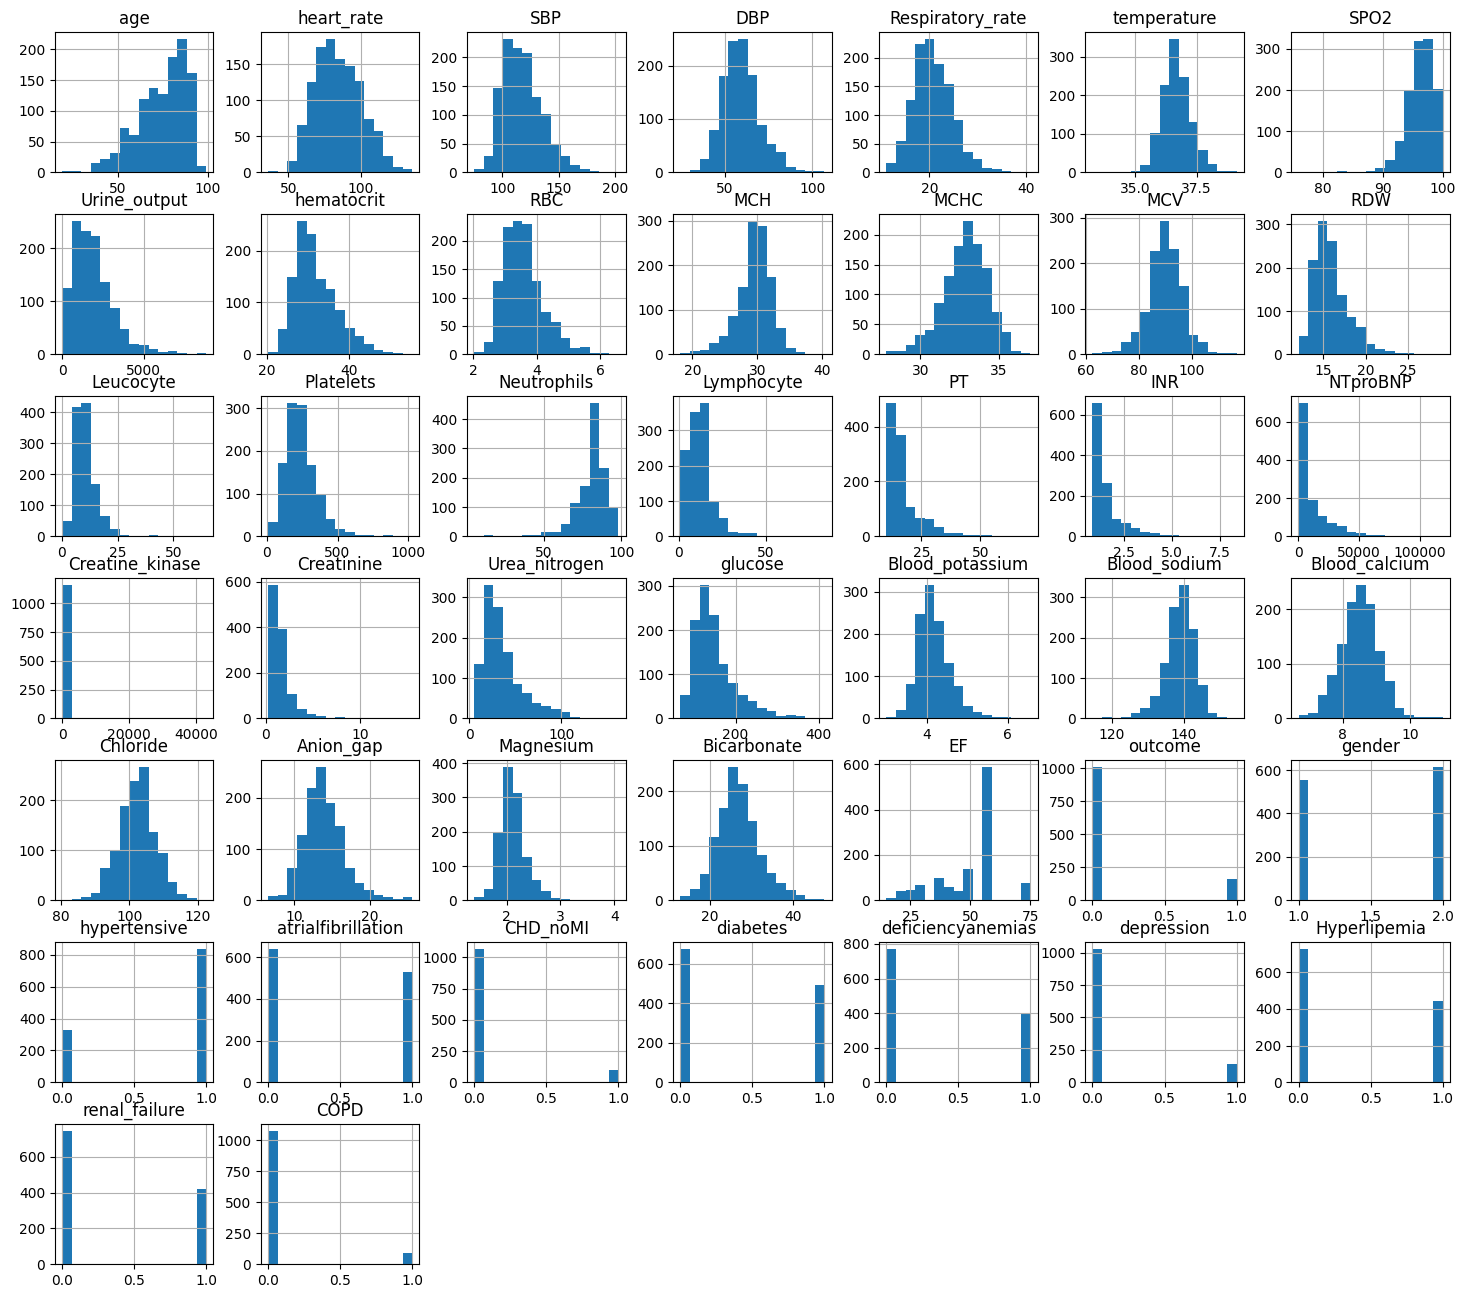

In [ ]:


#fill in missing data in binary variables w/ the modes
missing_vals = df_cat.isna().sum()
if missing_vals.any():
  for column in df_cat.columns:
    if missing_vals[column] > 0:
      df_cat[column].fillna(modes[column], inplace=True)




#combining cat & cont datasets to form one dataset with all variables, and no missing values
df = pd.concat([df_cont, df_cat], axis=1)


#reviewing distribution with all missing values filled in
df.hist(figsize=(18,16), bins=15)



df.shape

In [ ]:
def shapiro_wilk(data):
  for column in df_cont.columns:
    stat, p_value = shapiro(data[column])
    print(f"Column: {column}")
    print(f"stat=%.3f, p=%.3f" %(stat, p_value))
    if (p_value > 0.05):
        print("NORMAL Distribution\n")
    else:
        print("Not Normal Distribution\n")

shapiro_wilk(df)


#all came out as "not normal distribution", reject null hypothesis

Column: age
stat=0.933, p=0.000
Not Normal Distribution

Column: heart_rate
stat=0.990, p=0.000
Not Normal Distribution

Column: SBP
stat=0.971, p=0.000
Not Normal Distribution

Column: DBP
stat=0.979, p=0.000
Not Normal Distribution

Column: Respiratory_rate
stat=0.983, p=0.000
Not Normal Distribution

Column: temperature
stat=0.982, p=0.000
Not Normal Distribution

Column: SPO2
stat=0.930, p=0.000
Not Normal Distribution

Column: Urine_output
stat=0.908, p=0.000
Not Normal Distribution

Column: hematocrit
stat=0.948, p=0.000
Not Normal Distribution

Column: RBC
stat=0.954, p=0.000
Not Normal Distribution

Column: MCH
stat=0.972, p=0.000
Not Normal Distribution

Column: MCHC
stat=0.988, p=0.000
Not Normal Distribution

Column: MCV
stat=0.988, p=0.000
Not Normal Distribution

Column: RDW
stat=0.913, p=0.000
Not Normal Distribution

Column: Leucocyte
stat=0.841, p=0.000
Not Normal Distribution

Column: Platelets
stat=0.919, p=0.000
Not Normal Distribution

Column: Neutrophils
stat=0.853

In [ ]:
#only keeping rows of values that are not outliers in the df

for column in df.columns:
    if column in min_dict and column in max_dict:
        min_val = min_dict[column]
        max_val = max_dict[column]
        df = df[(df[column] >= min_val) & (df[column] <= max_val)]

df.shape


(517, 44)

In [ ]:
#creating functions for data viz

def boxplot(dframe,column):
  variable = dframe[column]
  variable.plot(kind='box', figsize=(10,8))


def simple_scatter(dframe,x_var,y_var):

  x = df[x_var]
  y = df[y_var]

  plt.figure(figsize=(8,6))
  plt.scatter(x,y)
  plt.xlabel(x_var)
  plt.ylabel(y_var)

  plt.show()





#histogram

def histogram(dframe, variable, x):

  var = dframe[variable]

  var.plot.hist(bins=x, color='purple')


  plt.xlabel(variable)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of: {variable}')
  plt.show()




In [ ]:
#creating 2 more dataframes, separating patients who lived and those who died

df_dead = df[df['outcome'] == 1]
df_alive = df[df['outcome'] == 0]

df_alive.shape

(470, 44)

47


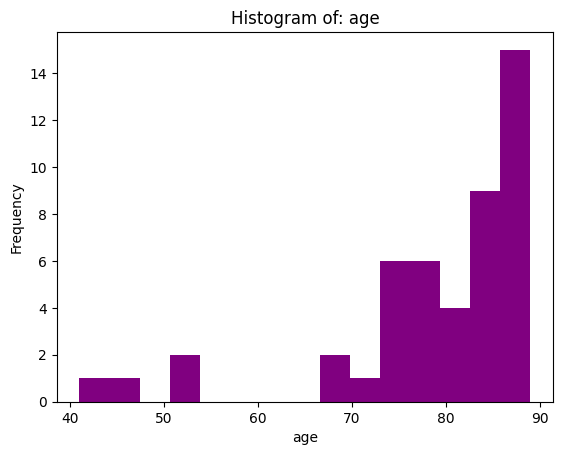

In [ ]:
histogram(df_dead,"age",15)
print(len(df_dead))

470


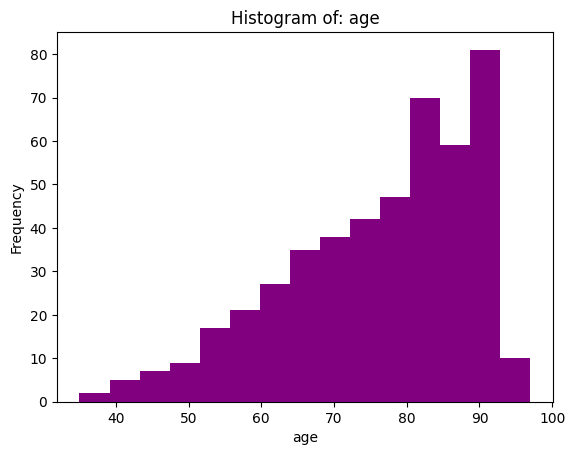

In [ ]:
histogram(df_alive,"age", 15)
print(len(df_alive))

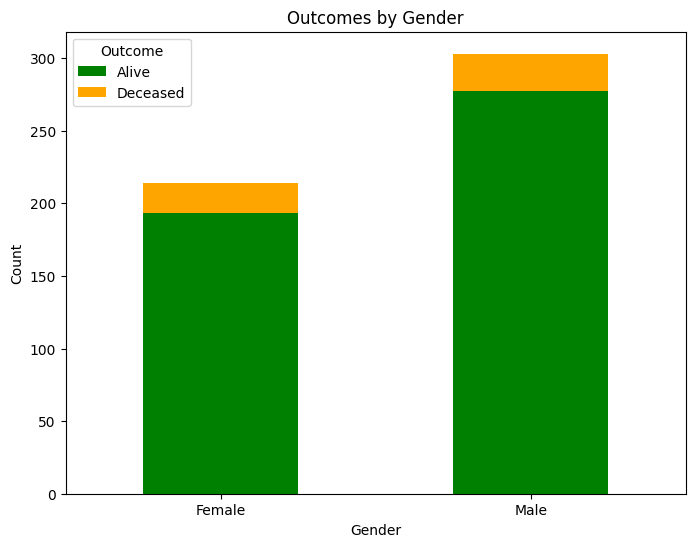

outcome  0.0  1.0
gender           
1        193   21
2        277   26


In [ ]:
#bar chart of totals of men and women, and alive vs. dead



outcome_counts = df.groupby(['gender', 'outcome']).size().unstack()

outcome_counts.plot(kind='bar', stacked=True, color=['green','orange'], figsize=(8,6))




plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Outcomes by Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(title='Outcome', labels=['Alive', 'Deceased'])

# Show the plot
plt.show()


print(outcome_counts)

#~10.88% of women died
#~9.38% of men died

In [ ]:
#logistic regression model

#formula = 'outcome ~ heart_rate + SBP + DBP + Respiratory_rate + SPO2 + Urine_output + hematocrit + RBC + MCH + MCHC + MCV + RDW + Leucocyte + Platelets + Neutrophils + Lymphocyte + PT + INR + NTproBNP + Creatine_kinase + Creatinine + Urea_nitrogen + glucose + Blood_sodium + Blood_calcium + Chloride + Bicarbonate + EF + gender + hypertensive + atrialfibrillation + CHD_noMI + diabetes + deficiencyanemias + depression + Hyperlipemia + renal_failure + COPD + age + Blood_potassium + Anion_gap'

formula = 'outcome ~ heart_rate + Leucocyte + Platelets + Neutrophils + Lymphocyte + Creatine_kinase + Creatinine + Urea_nitrogen + Bicarbonate + atrialfibrillation + CHD_noMI + COPD'
model = smf.glm(formula, df, family=sm.families.Binomial()).fit()
print(model.summary())


#Interesting that age got removed very quickly because it had a very high p value


                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                  517
Model:                            GLM   Df Residuals:                      504
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -114.45
Date:                Sat, 06 Apr 2024   Deviance:                       228.90
Time:                        20:00:12   Pearson chi2:                 1.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1534
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.6538      4

In [ ]:
####### cleaned Data Dictionary #######

#outcome > alive = 0 ; death = 1 ***
#age > at time of hospital admission ***
#gender > 1 = female ; 2 = male ***
#hypertensive > 0 = no ; 1 = yes ***
#atrial fibrillation > 0 = no ; 1 = yes ***
#CHD with no MI > 0 = no ; 1 = yes
#diabetes > 0 = no ; 1 = yes ***
#deficiencyanemias > 0 = no ; 1 = yes
#depression > 0 = no ; 1 = yes ***
#hyperlipemia > 0 = no ; 1 = yes ***
#renal failure > 0 = no ; 1 = yes ***
#COPD > chronic obstructive pulmonary disease > 0 = no ; 1 = yes ****
#Heart Rate ***
#Systolic Blood Pressure ***
#diastolic blood pressure ***
#Respiratory Rate ***
#temperature ***
#SPO2 > saturation pulse oxygen ***
#urine output > first 24 hours ***
#hematocrit
#RBC > red blood cells ***
#MCH > mean corpuscular hemoglobin
#MCHC > mean corpuscular hemoglobin concentration
#MCV > mean corpuscular volume
#RDW > red blood cell distrubtion width
#Leucocyte
#Platelets ***
#Neutrophils ***
#lymphocytes ***
#PT > prothrombin time ***
#INR > internal normalized ratio
#NT-proBNP
#Creatine kinase
#Creatinine
#urea nitrogen ***
#glucose ***
#blood potassium ***
#blood sodium ***
#blood calcium ***
#chloride
#anion gap
#magnesium ***
#bicarbonate
#EF > ejection fraction ***



#sodium increases, potassium (3.5 - 5 is healthy) goes down
#calcium and mag have positive correaltion
#mag and pot have positive correlation
#sex, depression and heart failure
#NT-proBNP (>= 125 is evidence of HF)
#creatine kinase
      #Male: 55-170 units/L or 55-170 units/L (SI units)
      #Female: 30-135 units/L or 30-135 units/L (SI units),
#EF (50-70)
